<a href="https://colab.research.google.com/github/Yogesh2111/Projects/blob/main/LANE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

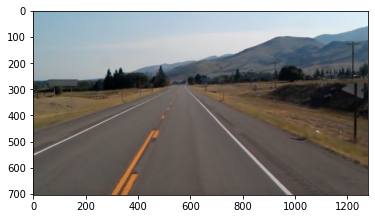

In [23]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

image= cv2.imread('test_image.png')
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [24]:
print(image.shape)
height = image.shape[0]
width = image.shape[1]

(704, 1279, 3)


(704, 1279, 3)


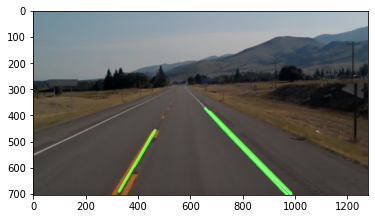

In [26]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
   match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

image = cv2.imread('test_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)
lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)
image_with_lines = drow_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()